# Plots for the 2MDM analysis

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from auxPlots import columnsDict, colorDict, defaultPars
import itertools

pd.option_context('display.max_columns', None)
pd.option_context('display.max_rows', None)

pd.options.mode.chained_assignment = None #Disable copy warnings

plt.rcParams.update(defaultPars) #Figure resolution

#### Get data in pcl format and print all columns names

In [2]:
#Merge with SModelS DataFrame
pclFiles = ['../data/smodels_results.pcl']
dfs = [pd.read_pickle(i) for i in pclFiles]
dataDF = pd.concat(dfs, ignore_index=True)
dataDF.rename(columns=columnsDict,inplace=True)
dropCols = [c for c in dataDF.columns if ('Output' in c or 'weight' in c)]
dataDF.drop(columns=dropCols,inplace=True)
dataDF.set_index('filename',drop=True,inplace=True)
print(dataDF.columns.values.tolist()) #Print all columns names

['mChi', 'mS', 'mZp', 'mass.9000002', 'mass.9000003', 'mass.9000004', 'mass.9000005', 'width.9000002', 'width.9000003', 'width.9000004', 'width.9000005', 'width.9000006', 'width.9900026', 'width.9900032', 'gchi', 'gq', 'sina', 'extpar.4', 'xsec8TeV(fb).9900032', 'xsec8TeV(fb).9900026', 'xsec13TeV(fb).9900032', 'xsec13TeV(fb).9900026', 'BRs.sd.W-,W+', 'BRs.sd.higgs,higgs', 'BRs.sd.Z,Z', 'BRs.sd.t-,t+', 'BRs.sd.chi,chi', 'BRs.sd.ta+,ta-', 'BRs.zp.chi,chi', 'BRs.zp.c,c', 'BRs.zp.q,q', 'BRs.zp.b,b', 'BRs.zp.t-,t+', 'totalxsec13TeV(fb)', 'totalxsec8TeV(fb)', 'CombinedRes', 'Total xsec for missing topologies (fb)', 'Total xsec for missing topologies with displaced decays (fb)', 'Total xsec for missing topologies with prompt decays (fb)', 'Total xsec for topologies outside the grid (fb)', 'ExptRes.result0.maxcond', 'ExptRes.result0.theory prediction (fb)', 'ExptRes.result0.upper limit (fb)', 'ExptRes.result0.expected upper limit (fb)', 'ExptRes.result0.TxNames', 'ExptRes.result0.Mass (GeV)', 

#### Filter couplings

In [3]:
gchi = 0.6
gq = 0.1
sina = 0.25
dataDF = dataDF[((dataDF['gchi'] == gchi) & (dataDF['gq'] == gq) & (dataDF['sina'] == sina))]

#### Set r = 0 for points with no results 

In [4]:
#Set points without results with r == 0
dataDF.fillna(value={c : 0 for c in dataDF.columns if c.endswith('.r')}, inplace=True)
#Sort points according to r value:
dataDF = dataDF.sort_values(by=['ExptRes.result0.r'],ascending=False)

# Plot Results

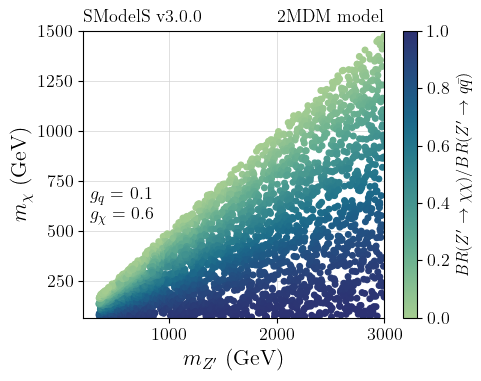

In [11]:
cm = sns.color_palette("coolwarm", as_cmap=True)
cm = sns.color_palette("crest", as_cmap=True)


x = dataDF['mZp']
y = dataDF['mChi']
# BRs.zp.q,q includes a single light (u,s,d) quark flavor, so we need to multiply by 3!
c = dataDF['BRs.zp.chi,chi']/(3*dataDF['BRs.zp.q,q']+dataDF['BRs.zp.c,c']+dataDF['BRs.zp.b,b']+dataDF['BRs.zp.t-,t+'])
sc = plt.scatter(x,y,c=c, cmap=cm, vmin=0, vmax=1)

    

cb = plt.colorbar(sc)
cb.set_label(label=r'$BR(Z^\prime \to \chi \chi)/BR(Z^\prime \to q \bar{q})$',fontsize=12)

plt.xlabel(r'$m_{Z^{\prime}}$ (GeV)')
plt.ylabel(r'$m_{\chi}$ (GeV)')
textstr = '\n'.join((
    r'$g_q =$ %1.1f' %gq, 
    r'$g_{\chi} = %1.1f$' %gchi))

plt.text(0.022,0.34,textstr,
         bbox=dict(facecolor='white', edgecolor='none'),transform = plt.gca().transAxes)

plt.title(r'SModelS v3.0.0', loc='left')
plt.title(r'2MDM model', loc='right')

plt.xlim(200, 3000)
plt.ylim(65, 1500)

plt.tight_layout()
plt.savefig('./figures/2mdm_zpBRs.png')
plt.show()


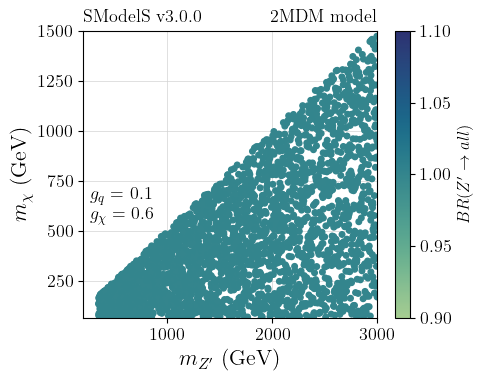

In [6]:
cm = sns.color_palette("coolwarm", as_cmap=True)
cm = sns.color_palette("crest", as_cmap=True)


x = dataDF['mZp']
y = dataDF['mChi']
c = dataDF['BRs.zp.chi,chi']+3*dataDF['BRs.zp.q,q']+dataDF['BRs.zp.c,c']+dataDF['BRs.zp.b,b']+dataDF['BRs.zp.t-,t+']
sc = plt.scatter(x,y,c=c, cmap=cm, vmin=0.9, vmax=1.1)

    

cb = plt.colorbar(sc)
cb.set_label(label=r'$BR(Z^\prime \to all)$',fontsize=12)

plt.xlabel(r'$m_{Z^{\prime}}$ (GeV)')
plt.ylabel(r'$m_{\chi}$ (GeV)')
textstr = '\n'.join((
    r'$g_q =$ %1.1f' %gq, 
    r'$g_{\chi} = %1.1f$' %gchi))

plt.text(0.022,0.34,textstr,
         bbox=dict(facecolor='white', edgecolor='none'),transform = plt.gca().transAxes)

plt.title(r'SModelS v3.0.0', loc='left')
plt.title(r'2MDM model', loc='right')

plt.xlim(200, 3000)
plt.ylim(65, 1500)

plt.tight_layout()
plt.show()
